In [1]:
import torch
from setuptools.windows_support import hide_file
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchsummary import summary
import numpy as np
import matplotlib.pyplot as plt

### Loading Data

In [34]:
training_data = datasets.mnist.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.mnist.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

In [37]:
training_data, validation_data = torch.utils.data.random_split(training_data, [50000, 10000])

In [8]:
print(len(training_data),len(validation_data),len(test_data))

50000 10000 10000


### Fixed MLP with Increasing Training Dataset

Create a MLP with one hidden layer with 200 units for Fashion MNIST classification. Use ReLU activation.

Use a random fraction of the training set (split above) to perform the training. Always use the same validation set.

Use SGD and cross-entropy loss and suitable learning rate.

Start with a single small batch for training (batch size 8) and make sure that you can overfit, i.e. bring the training accuracy to 100%.

Then, gradually increase the training set. Let it grow until you obtain values for the training and the validation loss which no longer indicate overfitting. Use a fixed batch size (batchsize 32).

#### MLP Class

In [18]:
# define a method that provides an instance of an MLP which uses as a list of units per layer as input

def mlp(units = [28*28, 200, 10]):
    """
    Creates an instance of an MLP with layers as specified in the 'units'-list (list of integers).
    """
    return torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Linear(units[0], units[1]),
        torch.nn.ReLU(),
        torch.nn.Linear(units[1], units[2])
    )

In [42]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [20]:
# create an instance and its summary
model = mlp().to(device)
from torchsummary import summary
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 200]         157,000
              ReLU-3                  [-1, 200]               0
            Linear-4                   [-1, 10]           2,010
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.61
Estimated Total Size (MB): 0.62
----------------------------------------------------------------


#### Training Loop 

In [43]:
def train_eval(model, lr, n_epochs, batch_size, training_data, validation_data):
    """
    Performs the training of a model with given learning rate (lr), 
    number of epochs (nepochs), batchsize (nbatch) and training and validation data.
    Suitable data loaders are instantiated for the training and validation datasets.
    Keep book about cost and accuracy (per epoch) for both training and validation set.
    """
    cost_hist = []
    cost_hist_test = []
    acc_hist = []
    acc_hist_test = []


    # YOUR CODE HERE #
    cost_ce = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    training_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

    for epoch in range(n_epochs):
        cost = 0.0
        acc = 0.0
        for batch, (X, Y) in enumerate(training_loader):
            X = X.to(device)
            Y = Y.to(device)
            pred = model(X)
            loss = cost_ce(pred, Y)
            cost += loss.item()
            acc += (pred.argmax(dim=1) == Y).float().sum().item()
            # gradient, parameter update
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        cost /= len(training_loader)
        acc /= len(training_loader.dataset)

        acc_hist.append(acc)
        cost_hist.append(cost)

        cost_test = 0.0
        acc_test = 0.0
        with torch.no_grad():
            for X, Y in test_loader:
                X = X.to(device)
                Y = Y.to(device)
                pred = model(X)
                cost_test += cost_ce(pred, Y).item()
                acc_test += (pred.argmax(dim=1) == Y).float().sum().item()

            cost_test /= len(test_loader)
            acc_test /= len(test_loader.dataset)

            cost_hist_test.append(cost_test)
            acc_hist_test.append(acc_test)
        print(f"Epoch {epoch}: {acc_test:.2f}")
    
    return cost_hist, cost_hist_test, acc_hist, acc_hist_test

#### First Training

Run a first training with only one small training batch (e.g. with a single batch of 64 samples). 
The small training set can be created by using the functionality `torch.utils.data.random_split` already used above. As validation set use the `validation_data` created above.  

This training run can be used to test whether the model and training loop are properly implemented. Explain why and in what sense it can be used as test.

This is something you can always do when training a model.

32 49968
Epoch 0: 0.16
Epoch 1: 0.20
Epoch 2: 0.20
Epoch 3: 0.20
Epoch 4: 0.20
Epoch 5: 0.20
Epoch 6: 0.21
Epoch 7: 0.22
Epoch 8: 0.25
Epoch 9: 0.28
Epoch 10: 0.32
Epoch 11: 0.34
Epoch 12: 0.36
Epoch 13: 0.38
Epoch 14: 0.39
Epoch 15: 0.40
Epoch 16: 0.40
Epoch 17: 0.41
Epoch 18: 0.41
Epoch 19: 0.41
Epoch 20: 0.41
Epoch 21: 0.41
Epoch 22: 0.41
Epoch 23: 0.41
Epoch 24: 0.41
Epoch 25: 0.40
Epoch 26: 0.40
Epoch 27: 0.40
Epoch 28: 0.40
Epoch 29: 0.41
Epoch 30: 0.41
Epoch 31: 0.41
Epoch 32: 0.41
Epoch 33: 0.41
Epoch 34: 0.41
Epoch 35: 0.41
Epoch 36: 0.41
Epoch 37: 0.41
Epoch 38: 0.41
Epoch 39: 0.41
Epoch 40: 0.41
Epoch 41: 0.41
Epoch 42: 0.42
Epoch 43: 0.42
Epoch 44: 0.42
Epoch 45: 0.42
Epoch 46: 0.42
Epoch 47: 0.43
Epoch 48: 0.43
Epoch 49: 0.43
Epoch 50: 0.43
Epoch 51: 0.43
Epoch 52: 0.43
Epoch 53: 0.43
Epoch 54: 0.44
Epoch 55: 0.44
Epoch 56: 0.44
Epoch 57: 0.44
Epoch 58: 0.44
Epoch 59: 0.44
Epoch 60: 0.44
Epoch 61: 0.44
Epoch 62: 0.45
Epoch 63: 0.45
Epoch 64: 0.45
Epoch 65: 0.45
Epoch 66: 0

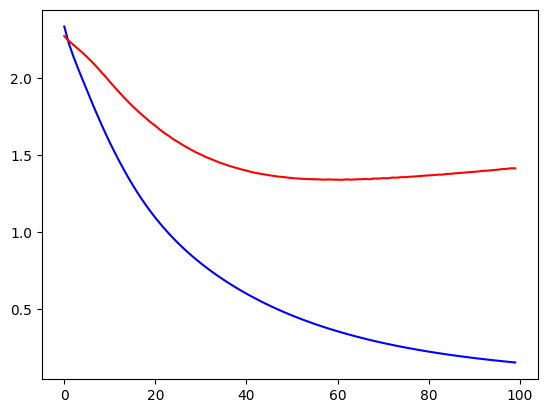

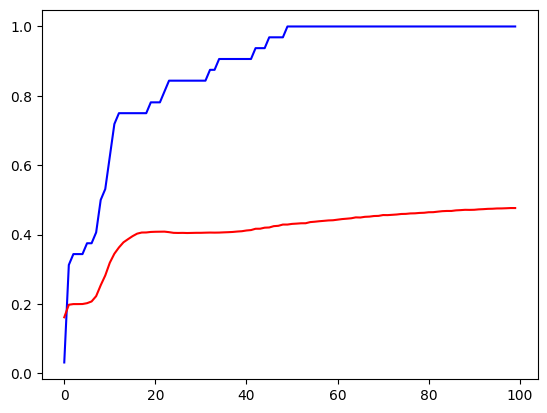

In [21]:
nbatch = 32
nbatches = 1
nepochs = 100
lr = 0.1

trainsize = nbatches*nbatch
trainset, rest = torch.utils.data.random_split(training_data, [trainsize, 50000-trainsize])
print(len(trainset), len(rest))

model = mlp([28*28, 200, 10]).to(device)

cost_train, cost_valid, acc_train, acc_valid = train_eval(model, lr, nepochs, nbatch, trainset, validation_data)

plt.figure(1)
plt.plot(range(nepochs), cost_train, "b-")
plt.plot(range(nepochs), cost_valid, "r-")

plt.figure(2)
plt.plot(range(nepochs), acc_train, "b-")
plt.plot(range(nepochs), acc_valid, "r-")

#### Evaluate Train and Validation Performance 

Now run several trainings with the same small model (one hidden layer) and explore for different number of training samples (different number of batches with 32 samples) used, how the train and validation performance evolve (cost and accuracy). Make sure that you train sufficiently long to obtain representative values for cost and accuracy with the given settings. Always use the same validation set (with 10'000 samples).

Create plots with training and validation performance vs number of training batches (one for cost and one for accuracy). Use the performance characteristics obtained at the end.

Discuss the whether there is a sufficient number of training samples for the given problem at hand. Specify a minimum number if applicable. Also consider whether you are in the underfitting regime.

Hint: Specify a list with the number of training batches you would like to perform trainings. Try to be economic with the resources used - try to keep the number of trainings limited.

In [ ]:
batch_size = 32
lr = 0.1

n_epochs = 100

n_batches = [10, 100, 1000]

fig, axes = plt.subplots(len(n_batches), 2, figsize=(12, 4 * len(n_batches)))

for i, batch in enumerate(n_batches):

    train_size = batch * batch_size
    train_set, rest = torch.utils.data.random_split(training_data, [train_size, 50000-train_size])

    model = mlp([28*28, 200, 10]).to(device)
    cost_train, cost_valid, acc_train, acc_valid = train_eval(model, lr, n_epochs, batch_size, train_set, validation_data)

    axes[i, 0].plot(range(n_epochs), cost_train, "b-", label="Train Loss")
    axes[i, 0].plot(range(n_epochs), cost_valid, "r-", label="Validation Loss")
    axes[i, 0].set_ylim(0, 2)
    axes[i, 0].set_title(f"Batches: {batch} - Loss")
    axes[i, 0].legend()

    axes[i, 1].plot(range(n_epochs), acc_train, "b-", label="Train Loss")
    axes[i, 1].plot(range(n_epochs), acc_valid, "r-", label="Validation Loss")
    axes[i, 1].set_ylim(0, 2)
    axes[i, 1].set_title(f"Batches: {batch} - Loss")
    axes[i, 1].legend()

Epoch 0: 0.35
Epoch 1: 0.50
Epoch 2: 0.61
Epoch 3: 0.63
Epoch 4: 0.64
Epoch 5: 0.63
Epoch 6: 0.65
Epoch 7: 0.60
Epoch 8: 0.67
Epoch 9: 0.69
Epoch 10: 0.66
Epoch 11: 0.69
Epoch 12: 0.69
Epoch 13: 0.72
Epoch 14: 0.73
Epoch 15: 0.69
Epoch 16: 0.75
Epoch 17: 0.74
Epoch 18: 0.75
Epoch 19: 0.70
Epoch 20: 0.74
Epoch 21: 0.74
Epoch 22: 0.70
Epoch 23: 0.75
Epoch 24: 0.75
Epoch 25: 0.76
Epoch 26: 0.76
Epoch 27: 0.65
Epoch 28: 0.76
Epoch 29: 0.75
Epoch 30: 0.76
Epoch 31: 0.76
Epoch 32: 0.77
Epoch 33: 0.75
Epoch 34: 0.73
Epoch 35: 0.76
Epoch 36: 0.71
Epoch 37: 0.76
Epoch 38: 0.76
Epoch 39: 0.75
Epoch 40: 0.76
Epoch 41: 0.76
Epoch 42: 0.75
Epoch 43: 0.74
Epoch 44: 0.75
Epoch 45: 0.77
Epoch 46: 0.77
Epoch 47: 0.76
Epoch 48: 0.76
Epoch 49: 0.75
Epoch 50: 0.76
Epoch 51: 0.77
Epoch 52: 0.75
Epoch 53: 0.77
Epoch 54: 0.76
Epoch 55: 0.77
Epoch 56: 0.76
Epoch 57: 0.76
Epoch 58: 0.77
Epoch 59: 0.76
Epoch 60: 0.77
Epoch 61: 0.77
Epoch 62: 0.77
Epoch 63: 0.77
Epoch 64: 0.75
Epoch 65: 0.77
Epoch 66: 0.77
Epoch

#### Comments: More batches lead to more overfitting, however, the accuracy on the validation set seems to work better as well.

### Evaluate Different Model Complexities

Use the same functionality implemented above (create MLP model, train and evaluate model) to evaluate different model complexities: Number of layers and number of units per layer.

Start with the small model used in Exercise 2. Then gradually increase the model complexity. Do this along two dimensions:
* a single hidden layer, but increasing the number of units.
* a fixed number of units per (hidden) layer, but increase the number of layers.
Make sure that you reach the overfitting regime (in either case).

Always use the full training set with 50'000 samples.

Again make sure that you train sufficiently long so that the obtained train and validation performance measures (cost, accuracy) are representative.

Create plots with training and validation performance (cost, accuracy) vs model complexity - one plot with number of units for the single hidden layer case, and one for varying number of layers. 

Again use the performance characteristics obtained at the end. 

Finally, discuss your findings.

In [20]:
def mlp_layers(units = [28*28, 200, 10], num_layers = 1):
    """
    Creates an instance of an MLP with layers as specified in the 'units'-list (list of integers).
    """
    layers = [torch.nn.Flatten(), torch.nn.Linear(units[0], units[1]), torch.nn.ReLU()]

    # Hidden layers
    for _ in range(num_layers - 1):
        layers.append(torch.nn.Linear(units[1], units[1]))  # Keep hidden size constant
        layers.append(torch.nn.ReLU())

    # Output layer
    layers.append(torch.nn.Linear(units[1], units[2]))

    return torch.nn.Sequential(*layers)

Epoch 0: 0.78
Epoch 1: 0.76
Epoch 2: 0.83
Epoch 3: 0.83
Epoch 4: 0.85
Epoch 5: 0.85
Epoch 6: 0.85
Epoch 7: 0.85
Epoch 8: 0.84
Epoch 9: 0.86
Epoch 10: 0.87
Epoch 11: 0.87
Epoch 12: 0.85
Epoch 13: 0.86
Epoch 14: 0.87
Epoch 15: 0.88
Epoch 16: 0.85
Epoch 17: 0.87
Epoch 18: 0.88
Epoch 19: 0.88
Epoch 20: 0.86
Epoch 21: 0.87
Epoch 22: 0.87
Epoch 23: 0.81
Epoch 24: 0.88
Epoch 25: 0.83
Epoch 26: 0.81
Epoch 27: 0.88
Epoch 28: 0.86
Epoch 29: 0.89
Epoch 30: 0.88
Epoch 31: 0.87
Epoch 32: 0.86
Epoch 33: 0.88
Epoch 34: 0.86
Epoch 35: 0.82
Epoch 36: 0.87
Epoch 37: 0.88
Epoch 38: 0.88
Epoch 39: 0.88
Epoch 40: 0.88
Epoch 41: 0.88
Epoch 42: 0.89
Epoch 43: 0.87
Epoch 44: 0.89
Epoch 45: 0.89
Epoch 46: 0.88
Epoch 47: 0.88
Epoch 48: 0.88
Epoch 49: 0.88
Epoch 50: 0.88
Epoch 51: 0.88
Epoch 52: 0.82
Epoch 53: 0.89
Epoch 54: 0.86
Epoch 55: 0.86


KeyboardInterrupt: 

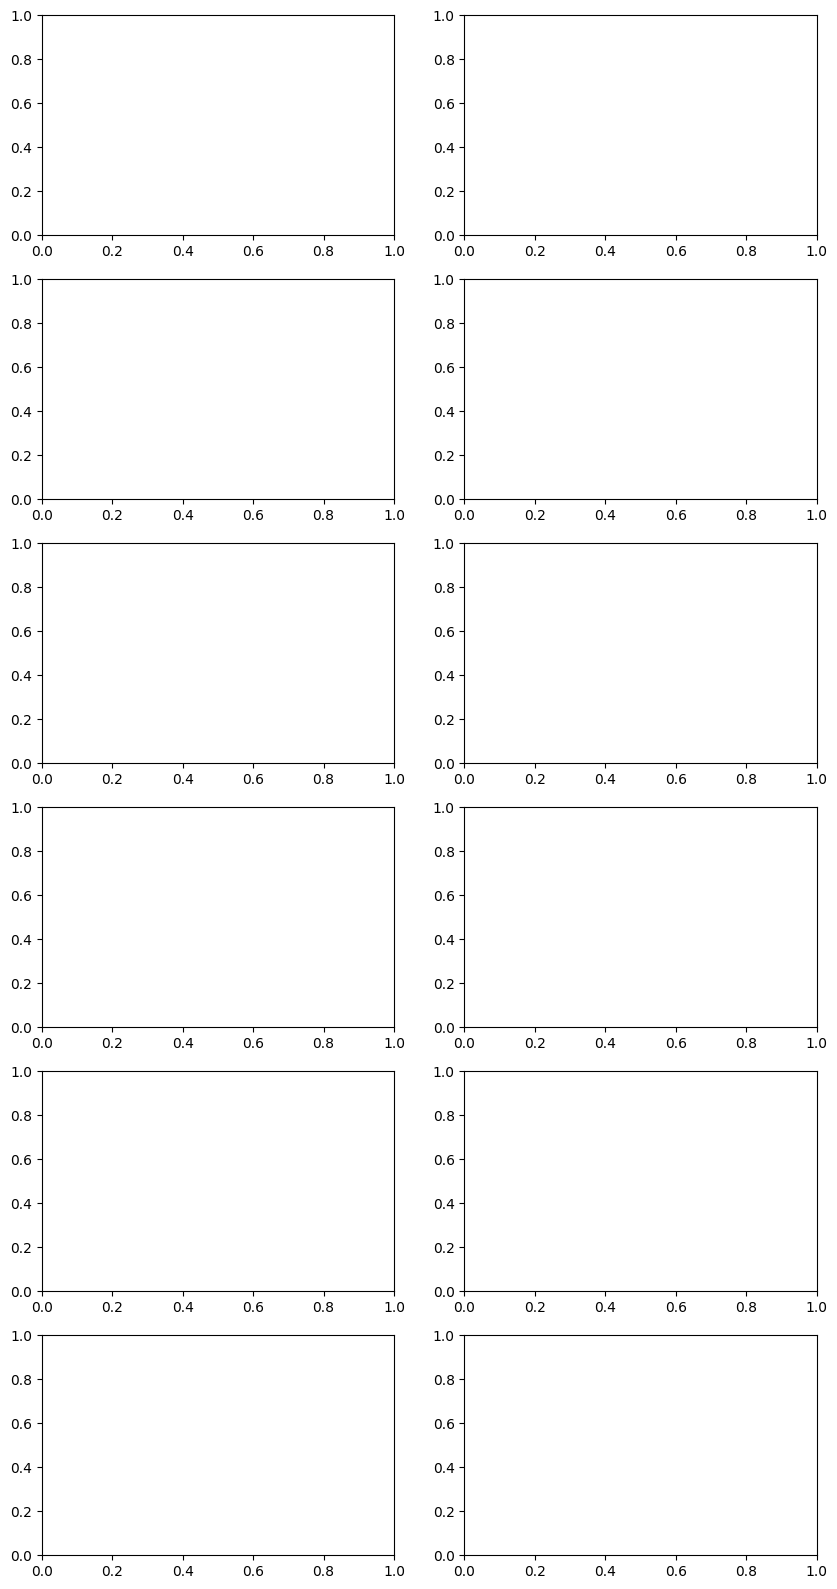

In [44]:
# YOUR CODE HERE #
# several iterations with the code snippets of the form:
batch_size = 64
n_epochs = 100
lr = 0.1

costs = {}

fig, ax = plt.subplots(6, 2, figsize=(10, 20))


for i, hidden_dim in enumerate([200, 400, 800]):
    model = mlp(units=[28*28, hidden_dim, 10]).to(device)

    cost_train, cost_valid, acc_train, acc_valid = train_eval(model, lr, n_epochs, batch_size, training_data, validation_data)
    costs[f'hidden_dim{hidden_dim}'] = {
        "hidden_dim": hidden_dim,
        "cost_train": cost_train[-1],
        "cost_valid": cost_valid[-1],
        "acc_train": acc_train[-1],
        "acc_valid": acc_valid[-1]
    }
    ax[i, 0].set_title("Cost, Hidden Dimension: " + str(hidden_dim))
    ax[i, 1].set_title("Accuracy, Hidden Dimension: " + str(hidden_dim))
    ax[i, 0].plot(range(n_epochs), cost_train, "b-")
    ax[i, 0].plot(range(n_epochs), cost_valid, "r-")

    ax[i, 1].plot(range(n_epochs), acc_train, "b-")
    ax[i, 1].plot(range(n_epochs), acc_valid, "r-")


for i, num_layers in enumerate([1, 2, 4]):
    model = mlp_layers(num_layers=num_layers).to(device)

    cost_train, cost_valid, acc_train, acc_valid = train_eval(model, lr, n_epochs, batch_size, training_data, validation_data)
    costs[f'num_layers{num_layers}'] = {
        "num_layers": num_layers,
        "cost_train": cost_train[-1],
        "cost_valid": cost_valid[-1],
        "acc_train": acc_train[-1],
        "acc_valid": acc_valid[-1]
    }

    i += 3
    ax[i, 0].set_title("Cost, Num Layers: " + str(num_layers))
    ax[i, 1].set_title("Accuracy, Num Layers: " + str(num_layers))
    ax[i, 0].plot(range(n_epochs), cost_train, "b-")
    ax[i, 0].plot(range(n_epochs), cost_valid, "r-")

    ax[i, 1].plot(range(n_epochs), acc_train, "b-")
    ax[i, 1].plot(range(n_epochs), acc_valid, "r-")

fig.tight_layout(h_pad=5, w_pad=5)

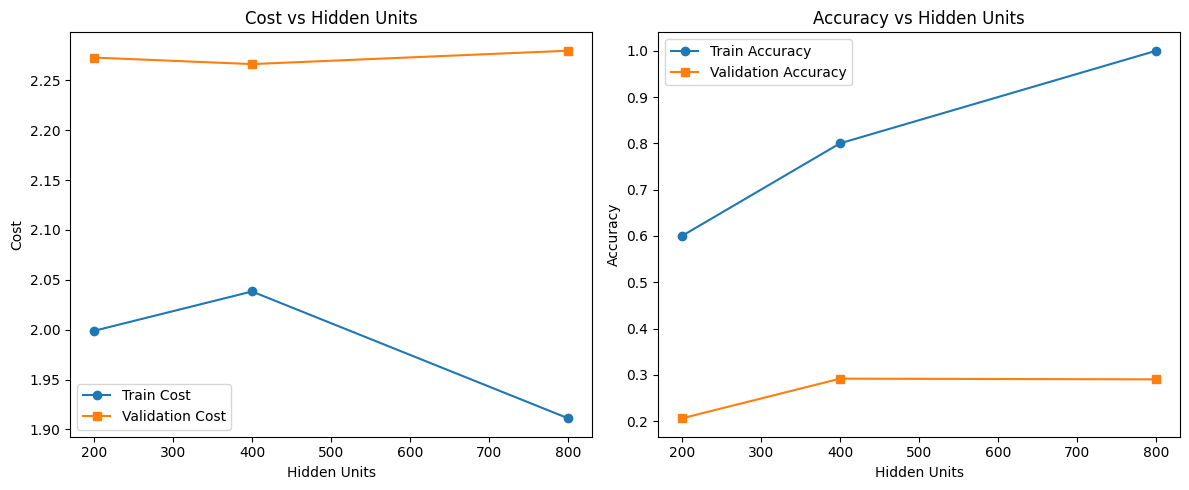

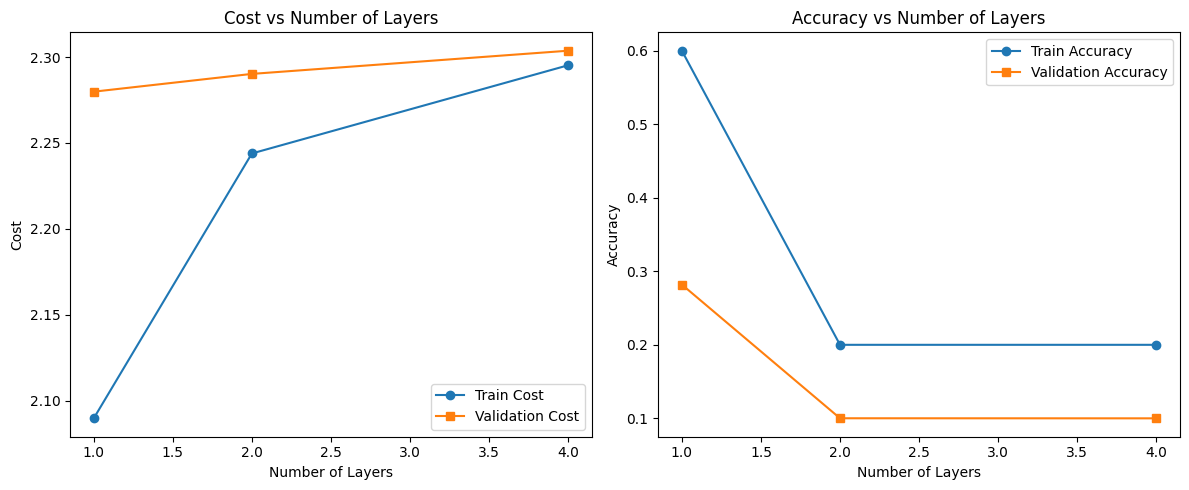

In [38]:
# Extract data for hidden units
hidden_units = sorted([v for k, v in costs.items() if 'hidden_dim' in k], key=lambda x: x['hidden_dim'])
hidden_sizes = [d['hidden_dim'] for d in hidden_units]
cost_train_h = [d['cost_train'] for d in hidden_units]
cost_valid_h = [d['cost_valid'] for d in hidden_units]
acc_train_h = [d['acc_train'] for d in hidden_units]
acc_valid_h = [d['acc_valid'] for d in hidden_units]

# Extract data for number of layers
layers = sorted([v for k, v in costs.items() if 'num_layers' in k], key=lambda x: x['num_layers'])
num_layers = [d['num_layers'] for d in layers]
cost_train_l = [d['cost_train'] for d in layers]
cost_valid_l = [d['cost_valid'] for d in layers]
acc_train_l = [d['acc_train'] for d in layers]
acc_valid_l = [d['acc_valid'] for d in layers]

# Plot for hidden units
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(hidden_sizes, cost_train_h, 'o-', label='Train Cost')
plt.plot(hidden_sizes, cost_valid_h, 's-', label='Validation Cost')
plt.xlabel('Hidden Units')
plt.ylabel('Cost')
plt.title('Cost vs Hidden Units')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hidden_sizes, acc_train_h, 'o-', label='Train Accuracy')
plt.plot(hidden_sizes, acc_valid_h, 's-', label='Validation Accuracy')
plt.xlabel('Hidden Units')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Hidden Units')
plt.legend()

plt.tight_layout()
plt.show()

# Plot for number of layers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(num_layers, cost_train_l, 'o-', label='Train Cost')
plt.plot(num_layers, cost_valid_l, 's-', label='Validation Cost')
plt.xlabel('Number of Layers')
plt.ylabel('Cost')
plt.title('Cost vs Number of Layers')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_layers, acc_train_l, 'o-', label='Train Accuracy')
plt.plot(num_layers, acc_valid_l, 's-', label='Validation Accuracy')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of Layers')
plt.legend()

plt.tight_layout()
plt.show()


#### Comments: YOUR findings.

### Add Regularisation

Finally, add regularisation - dropout or L1/L2-regularisation. 

To this end, you need to implement new functionality to instantiate the model.

Start with one of the overfitting cases of Exercise 3 and try to improve the validation performance by adding regularisation. You can use either dropout or L1/L2-regularisation.


In [2]:
# define a method that provides an instance of an MLP incl regularisation which uses as a list of units per layer as input 

def mlp_dropout(units = [28*28, 200, 10], p_in = 0.2, p_hidden=0.5):
    """
    Creates an instance of an MLP with layers as specified in the 'units'-list (list of integers) and dropout 
    regularisation. Dropout rate for all layers the same except for the first (p_in). For the output layer 
    no dropout applied. 
    """

    # YOUR CODE HERE #
    return torch.nn.Sequential(
        torch.nn.Flatten(),
        torch.nn.Dropout(p_in),
        torch.nn.Linear(units[0], units[1]),
        torch.nn.Dropout(p_hidden),
        torch.nn.ReLU(),
        torch.nn.Linear(units[1], units[2])
    )
    

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = mlp_dropout([28*28,200,10]).to(device)

from torchsummary import summary
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
           Dropout-2                  [-1, 784]               0
            Linear-3                  [-1, 200]         157,000
           Dropout-4                  [-1, 200]               0
              ReLU-5                  [-1, 200]               0
            Linear-6                   [-1, 10]           2,010
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 0.61
Estimated Total Size (MB): 0.63
----------------------------------------------------------------


#### Playing with different complexities and regularisation

Now play with different complexities and regularisation. 
Start with one of the overfitting cases identified in the previous exercise.
By adding regularisation, you should be able to make it non-overfitting, i.e. generalising better.
Note that for a given complexity, adding regularisation reduces the model capacity. This may need to be compensated by increasing the complexity of the model. 

Use again cost and accuracy for train and validation set to evaluate the results.

Finally, estimate the bias error and the generalisation error. 

In [44]:
# YOUR CODE HERE #
batch_size = 64
num_batches = 10
n_epochs = 50
lr = 0.1

train_size = num_batches * batch_size
train_set, rest = torch.utils.data.random_split(training_data, [train_size, 50000-train_size])

model = mlp_dropout([28*28,200,10]).to(device)

cost_train, cost_valid, acc_train, acc_valid = train_eval(model, lr, n_epochs, batch_size, train_set, validation_data)

Epoch 0: 0.33
Epoch 1: 0.52
Epoch 2: 0.53
Epoch 3: 0.58
Epoch 4: 0.59
Epoch 5: 0.60
Epoch 6: 0.61
Epoch 7: 0.61
Epoch 8: 0.66
Epoch 9: 0.66
Epoch 10: 0.66
Epoch 11: 0.68
Epoch 12: 0.68
Epoch 13: 0.69
Epoch 14: 0.69
Epoch 15: 0.70
Epoch 16: 0.69
Epoch 17: 0.71
Epoch 18: 0.71
Epoch 19: 0.69
Epoch 20: 0.71
Epoch 21: 0.71
Epoch 22: 0.71
Epoch 23: 0.73
Epoch 24: 0.73
Epoch 25: 0.72
Epoch 26: 0.73
Epoch 27: 0.72
Epoch 28: 0.72
Epoch 29: 0.74
Epoch 30: 0.71
Epoch 31: 0.73
Epoch 32: 0.72
Epoch 33: 0.74
Epoch 34: 0.74
Epoch 35: 0.74
Epoch 36: 0.73
Epoch 37: 0.74
Epoch 38: 0.74
Epoch 39: 0.74
Epoch 40: 0.73
Epoch 41: 0.74
Epoch 42: 0.74
Epoch 43: 0.74
Epoch 44: 0.75
Epoch 45: 0.73
Epoch 46: 0.74
Epoch 47: 0.74
Epoch 48: 0.74
Epoch 49: 0.74


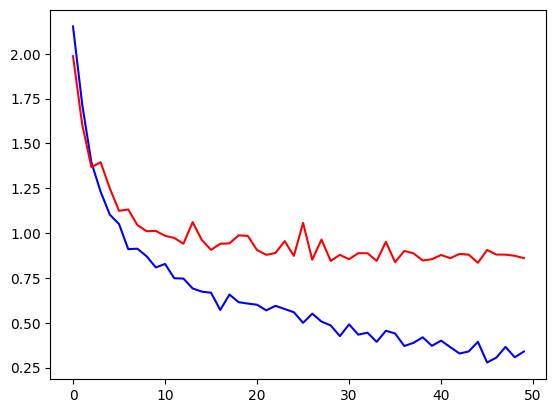

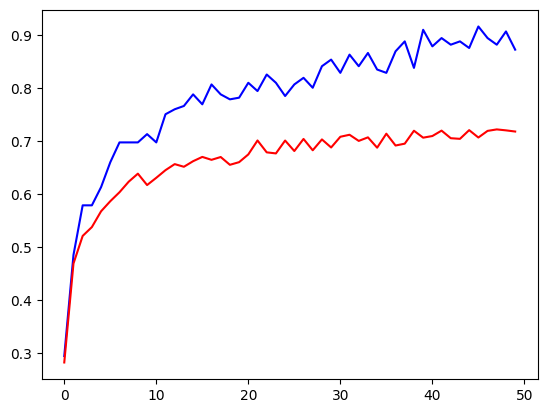

In [14]:
plt.figure(1)
plt.plot(range(n_epochs), cost_train, "b-")
plt.plot(range(n_epochs), cost_valid, "r-")

plt.figure(2)
plt.plot(range(n_epochs), acc_train, "b-")
plt.plot(range(n_epochs), acc_valid, "r-")